In [1]:
from statsmodels.tsa.seasonal import STL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/data/'
prices = pd.read_csv(INPUT_FOLDER + 'r_da_prices.csv')

      AREAS              DateTime  price_obs
0        FR  2015-01-01T00:00:00Z      51.93
1        FR  2015-01-01T01:00:00Z      48.76
2        FR  2015-01-01T02:00:00Z      42.27
3        FR  2015-01-01T03:00:00Z      38.41
4        FR  2015-01-01T04:00:00Z      35.72
...     ...                   ...        ...
35059    FR  2018-12-31T19:00:00Z      50.01
35060    FR  2018-12-31T20:00:00Z      45.50
35061    FR  2018-12-31T21:00:00Z      49.80
35062    FR  2018-12-31T22:00:00Z      44.26
35063    FR  2018-12-31T23:00:00Z      51.00

[35064 rows x 3 columns]


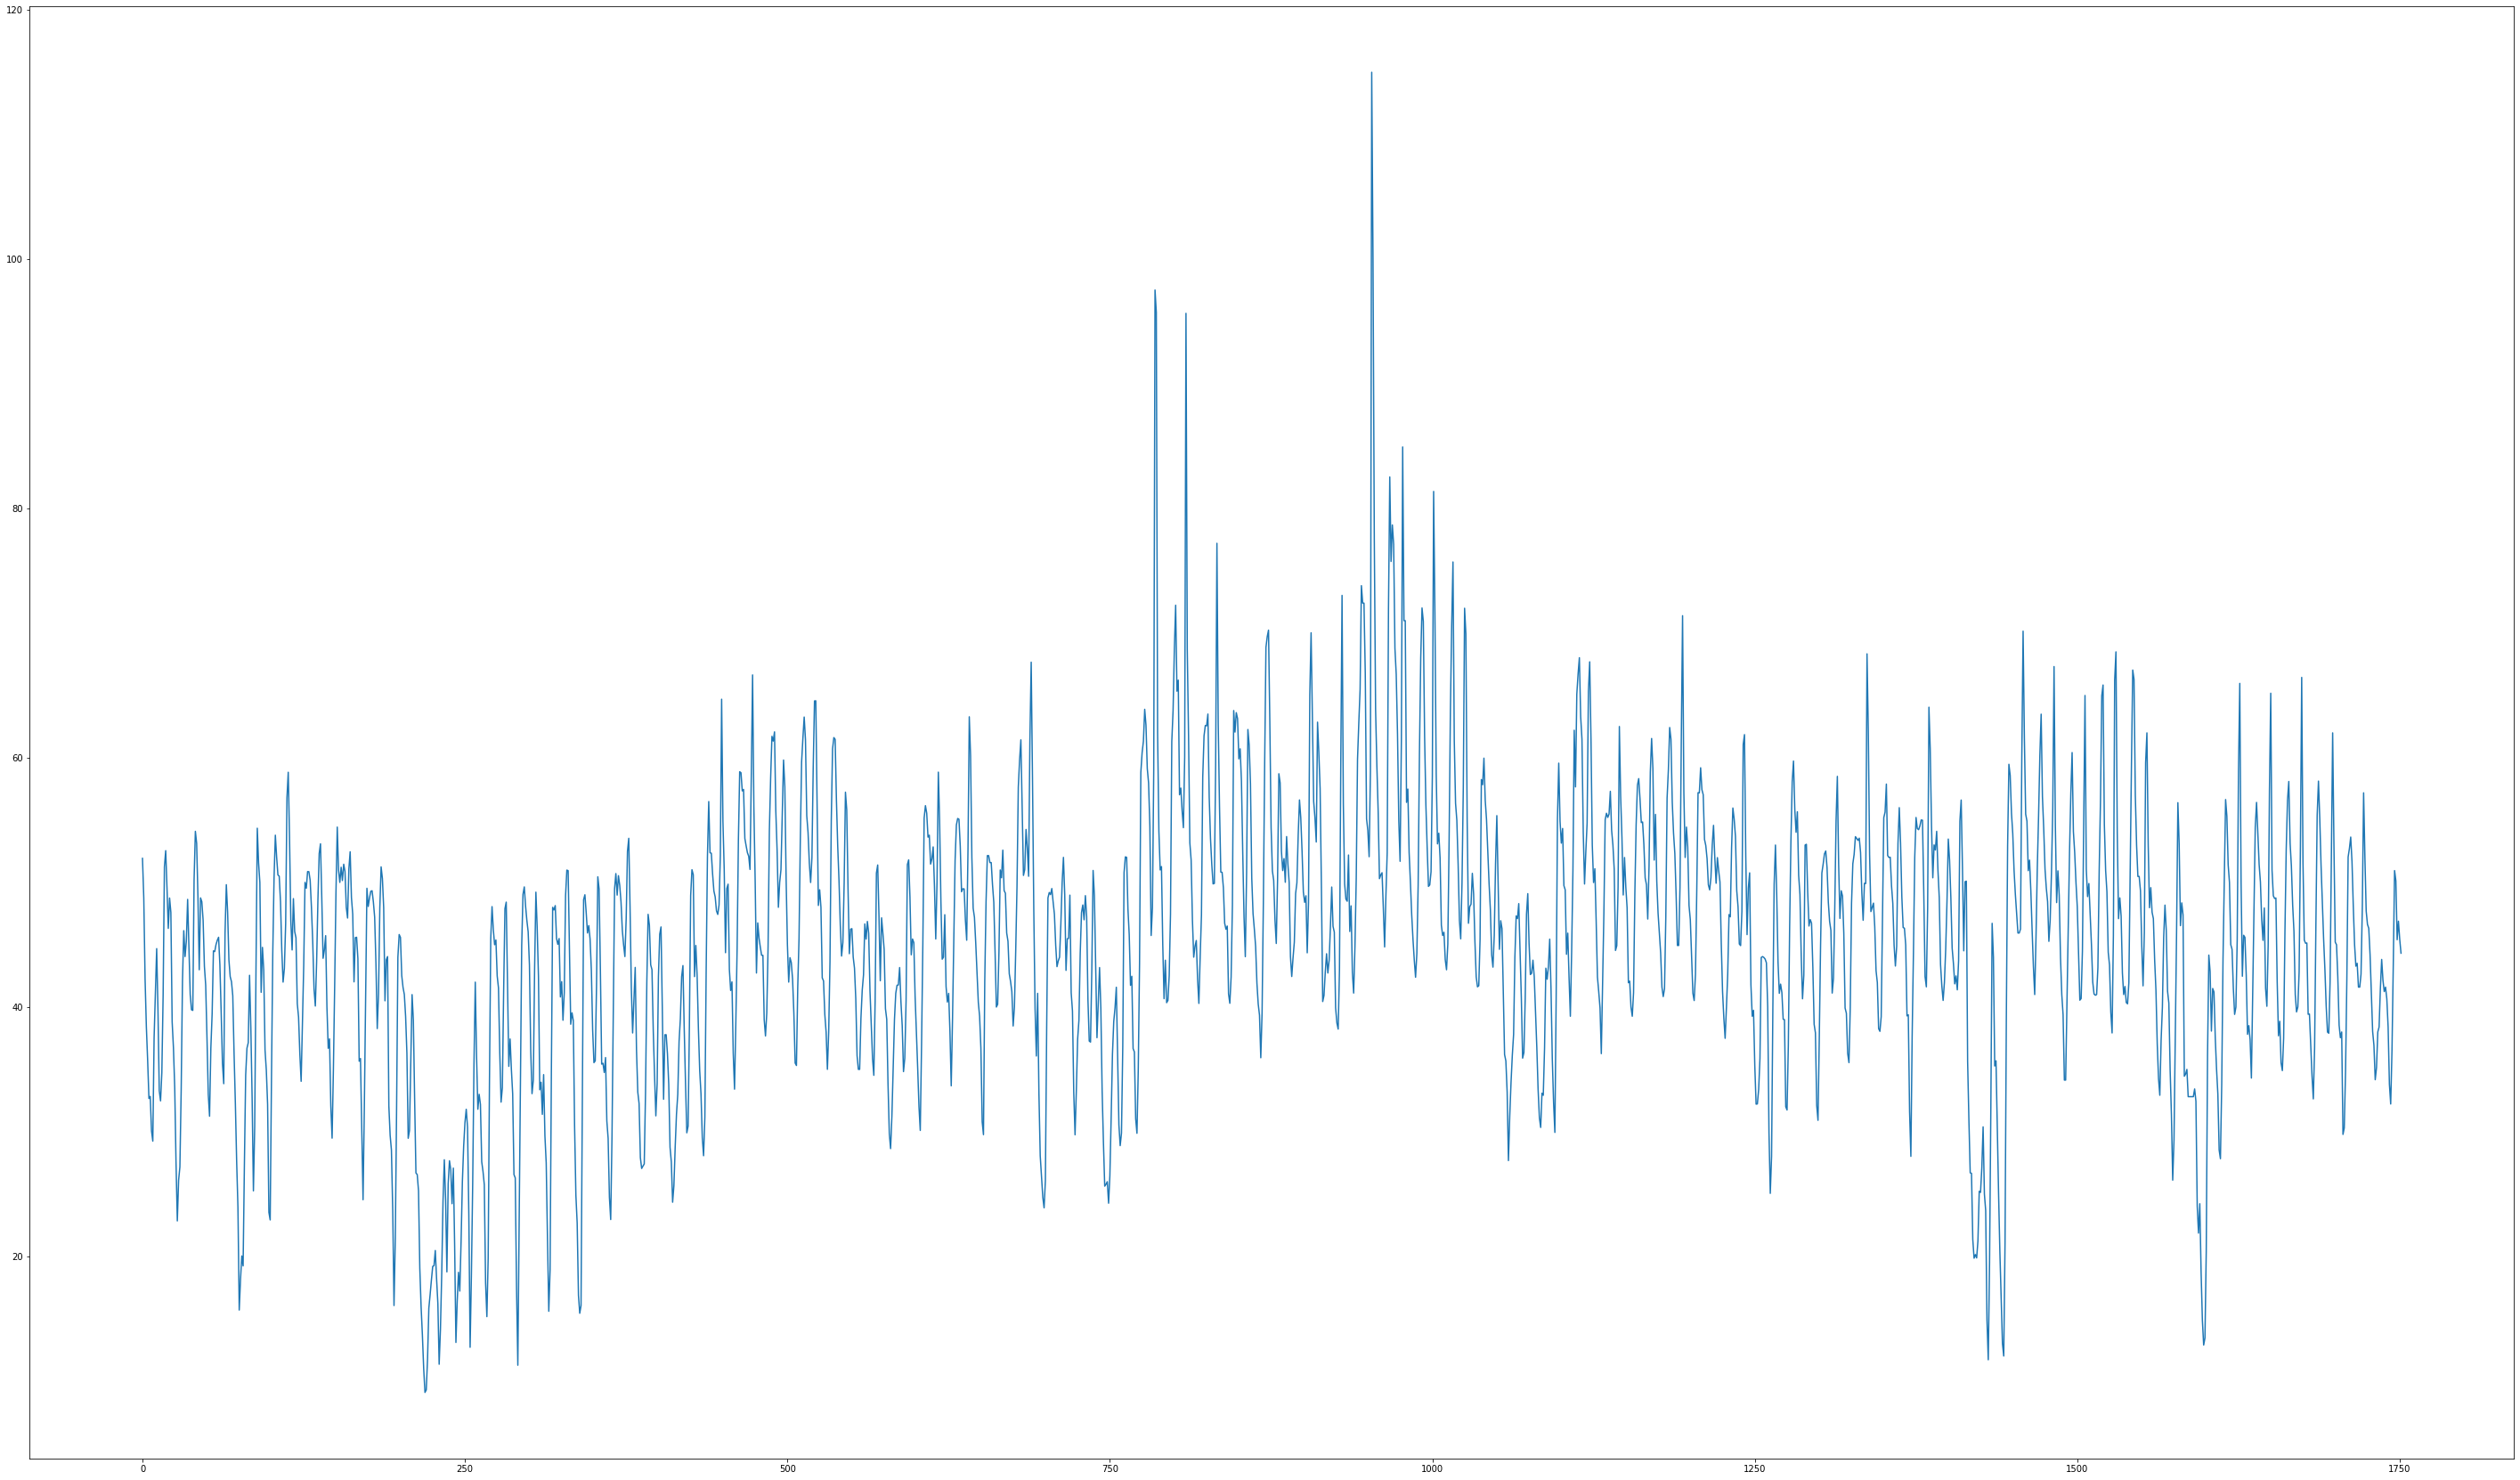

In [5]:
print(prices)
alpha = 0.2
prices_2015 = prices['price_obs'][0*8760:int(alpha*8760)].to_numpy()
plt.figure(figsize=(50, 30))
plt.plot(prices_2015)

In [17]:
res = STL(prices_2015, period=24*7*3).fit()

<Figure size 3600x2160 with 0 Axes>

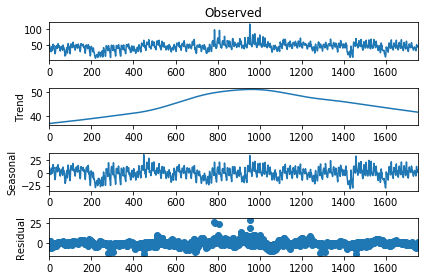

In [18]:
plt.figure(figsize=(50,30))
res.plot()
plt.show()

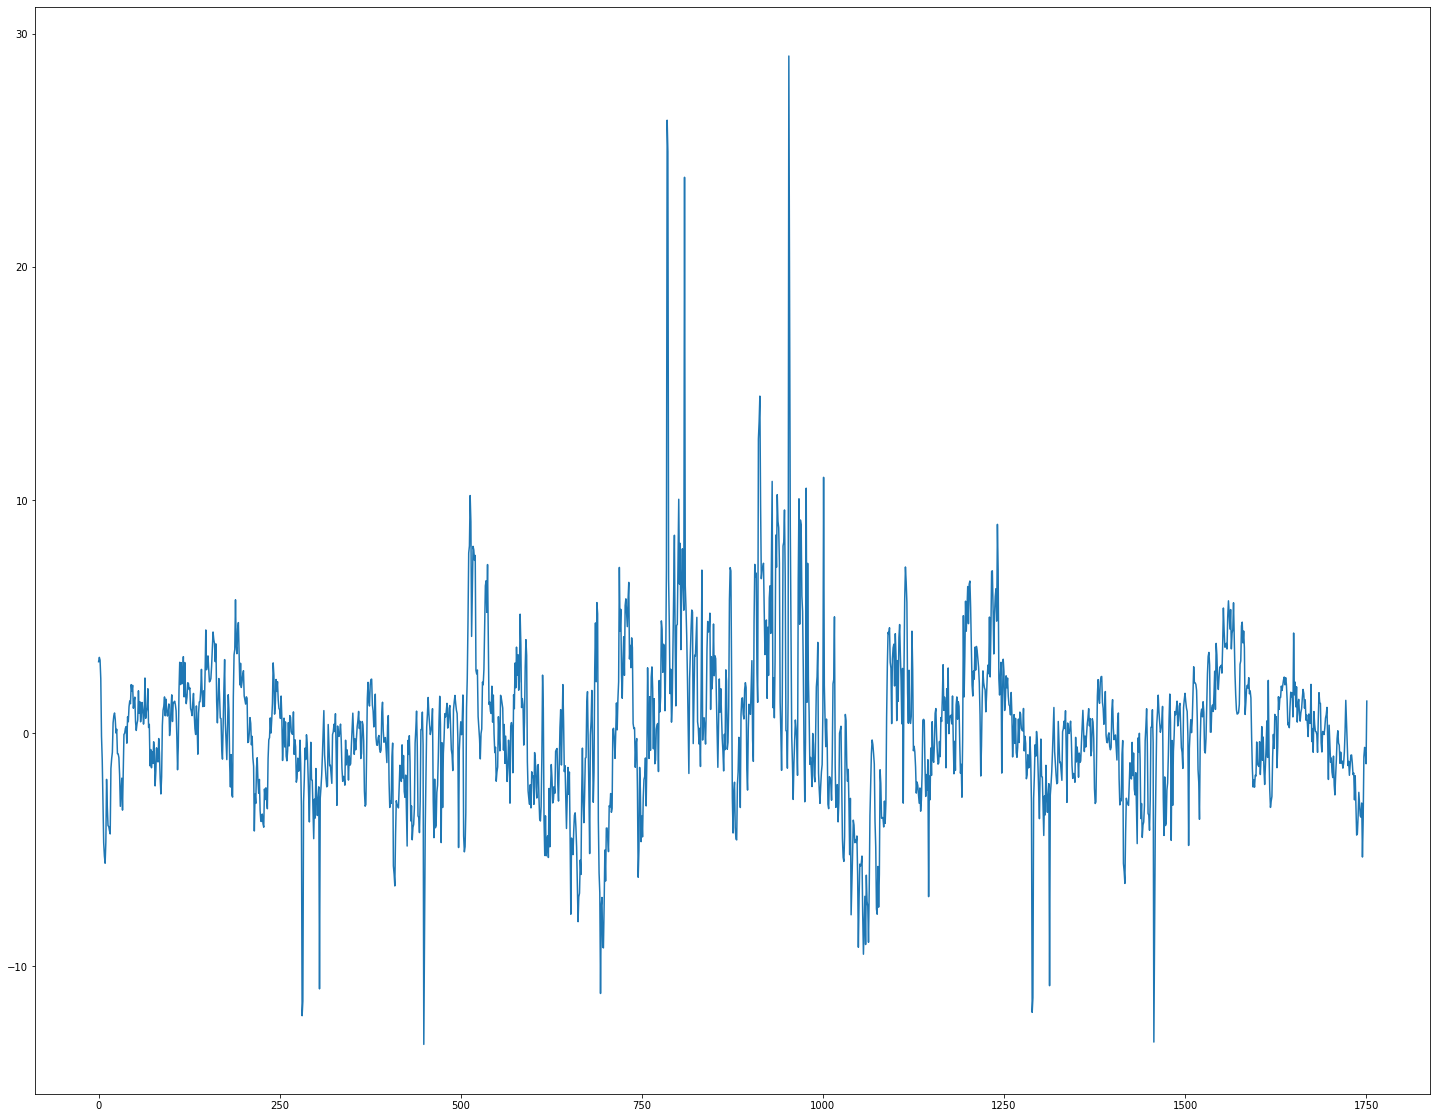

In [19]:
plt.figure(figsize=(25,20))
plt.plot(res.resid)

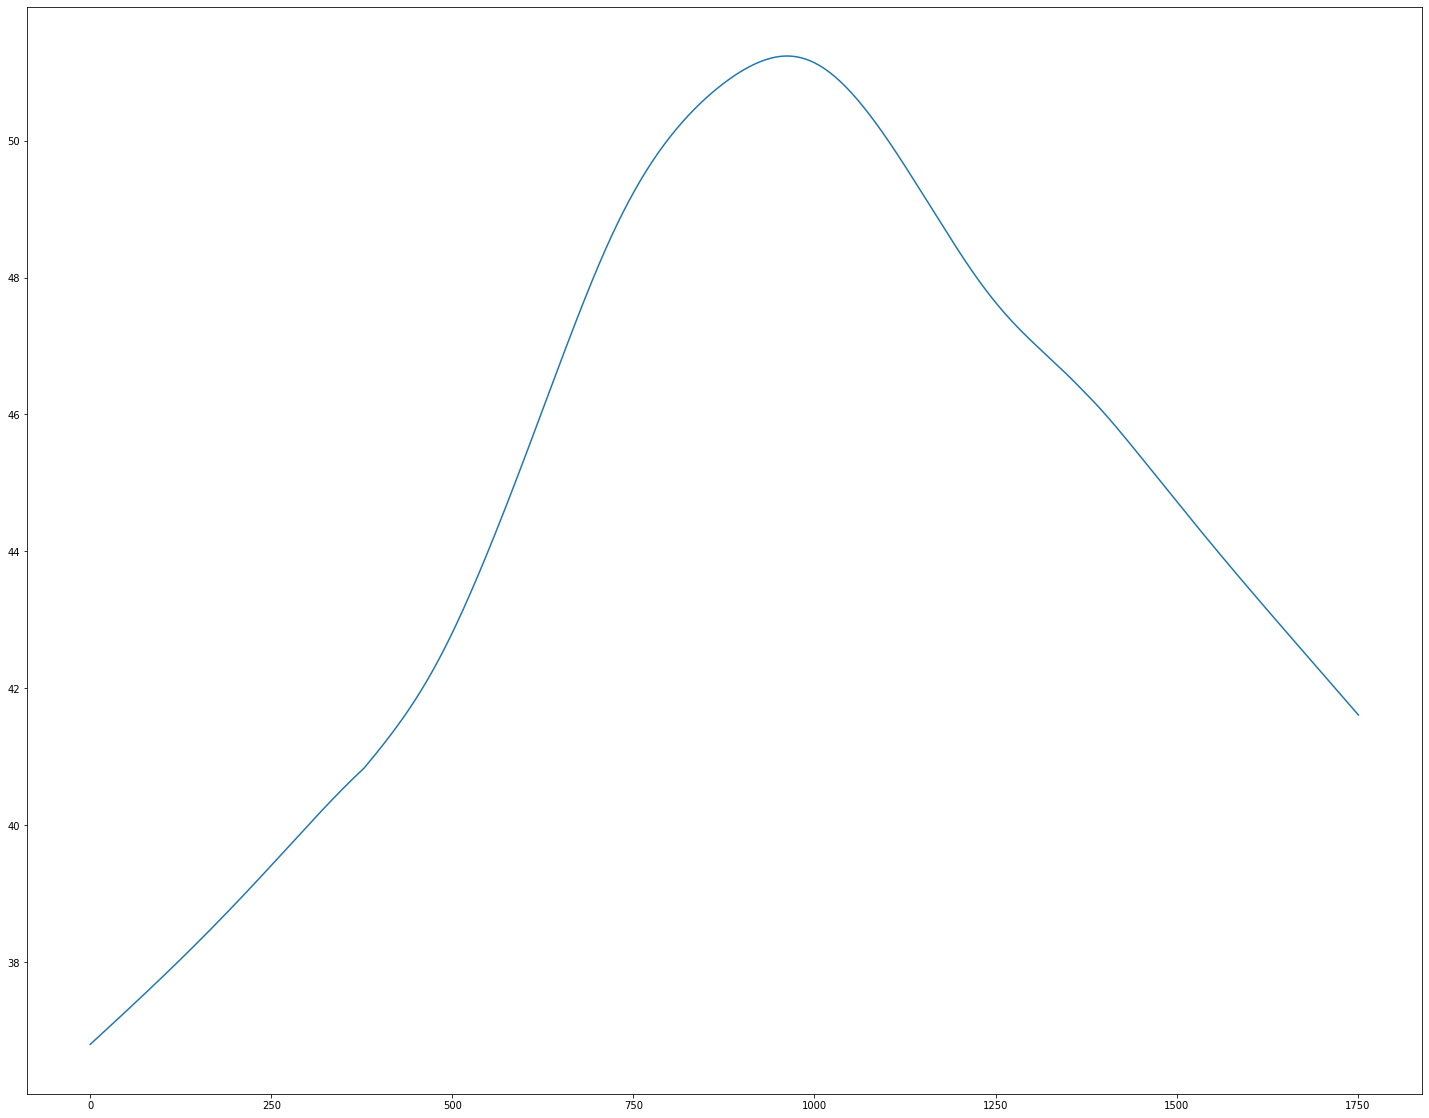

In [20]:
plt.figure(figsize=(25,20))
plt.plot(res.trend)

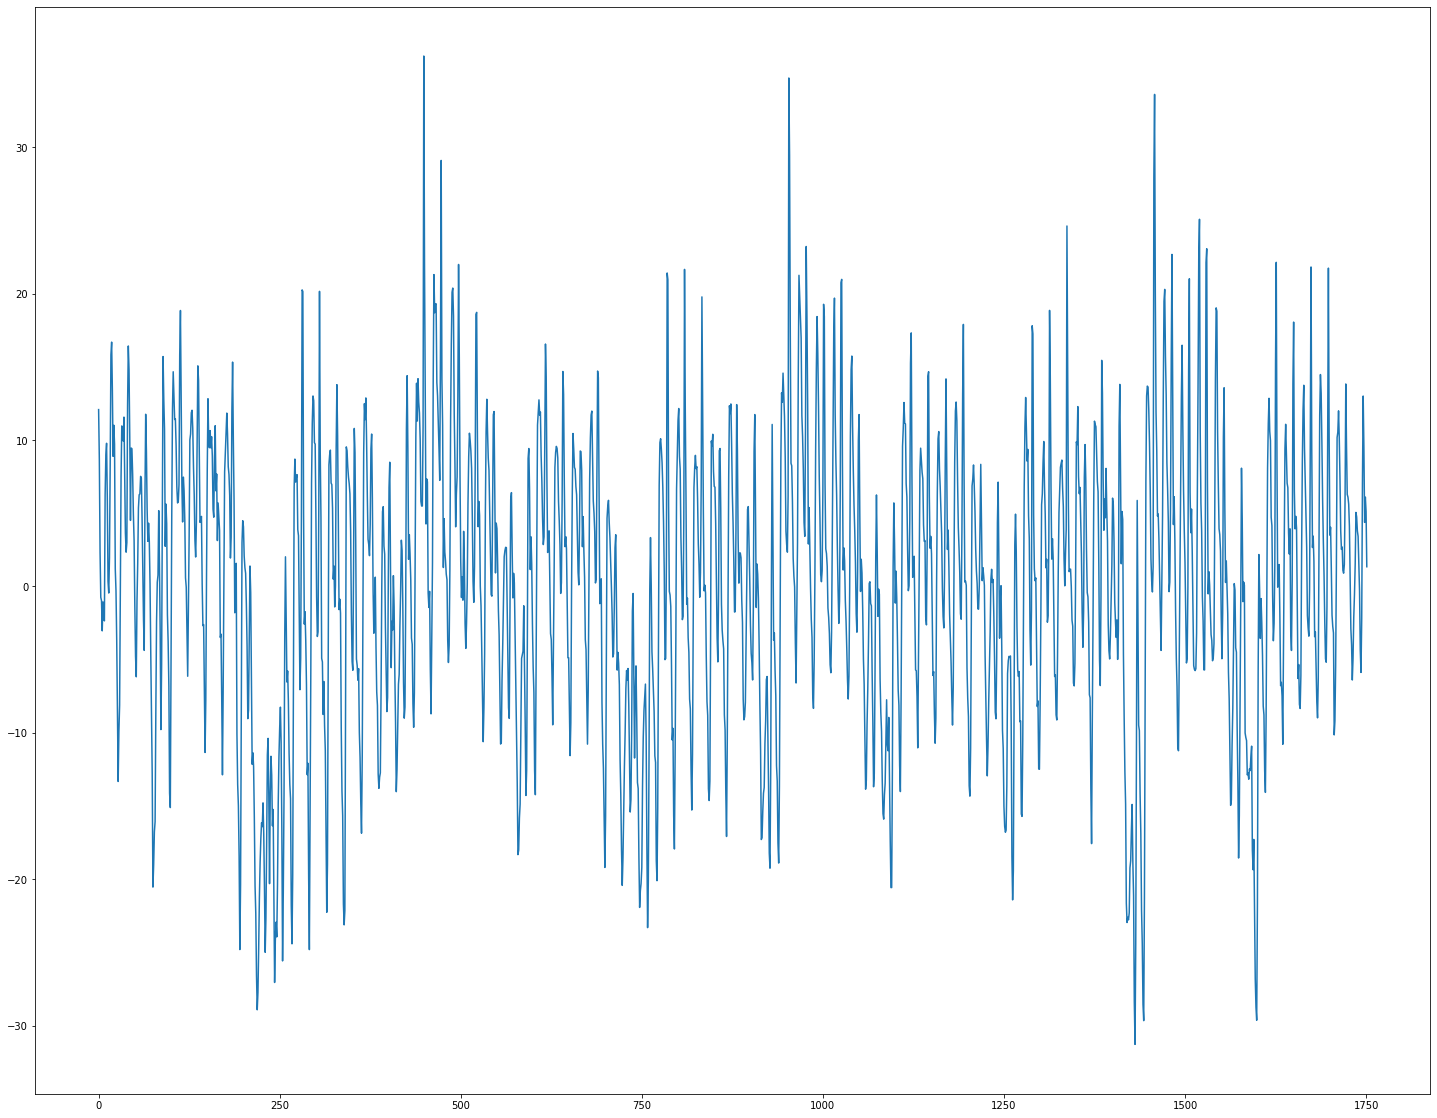

In [21]:
plt.figure(figsize=(25,20))
plt.plot(res.seasonal)

## Réunion des datasets

In [22]:
INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/data/'
OUTPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/data_preprocessed/'
years = [2015, 2016, 2017, 2018]

Déjà fait pour les prix observés, les prix du pétrole et des émissions, seulement de la lecture de fichiers

In [23]:
prices = pd.read_csv(INPUT_FOLDER + 'r_da_prices_df_15_18.csv')
print(prices)

       Unnamed: 0 AREAS          TIMESTAMP_d  price_obs
0               0    FR  2015-01-01 00:00:00      51.93
1               1    FR  2015-01-01 01:00:00      48.76
2               2    FR  2015-01-01 02:00:00      42.27
3               3    FR  2015-01-01 03:00:00      38.41
4               4    FR  2015-01-01 04:00:00      35.72
...           ...   ...                  ...        ...
35059       35059    FR  2018-12-31 19:00:00      50.01
35060       35060    FR  2018-12-31 20:00:00      45.50
35061       35061    FR  2018-12-31 21:00:00      49.80
35062       35062    FR  2018-12-31 22:00:00      44.26
35063       35063    FR  2018-12-31 23:00:00      51.00

[35064 rows x 4 columns]


In [24]:
fuel_emission_prices = pd.read_csv(INPUT_FOLDER + 'r_fuel_prices_df_15_18.csv')
print(fuel_emission_prices)

       Unnamed: 0   oil_price  coal_price  gas_price  co2_price  \
0               0  352.446024   93.546575  38.051287   6.903732   
1               1  352.422575   93.554525  38.022534   6.903888   
2               2  352.399126   93.562475  37.993781   6.904044   
3               3  352.375677   93.570425  37.965028   6.904199   
4               4  352.352228   93.578375  37.936275   6.904355   
...           ...         ...         ...        ...        ...   
35059       35059  389.699802  141.278862  56.241700  23.124524   
35060       35060  389.670362  141.288722  56.239082  23.123750   
35061       35061  389.640922  141.298583  56.236464  23.122976   
35062       35062  389.611482  141.308443  56.233847  23.122202   
35063       35063  389.582042  141.318304  56.231229  23.121429   

               TIMESTAMP_d  
0      2015-01-01 00:00:00  
1      2015-01-01 01:00:00  
2      2015-01-01 02:00:00  
3      2015-01-01 03:00:00  
4      2015-01-01 04:00:00  
...                  

Facteur de disponibilité

In [25]:
avail_factor = pd.DataFrame()
for year in years:
    local_factor = pd.read_csv(INPUT_FOLDER + f'r_availabilityFactor{year}_FR.csv')
    avail_factor = pd.concat((avail_factor, local_factor), ignore_index=True)
print(avail_factor)

        TIMESTAMP           TECHNOLOGIES  availabilityFactor
0               1             Fossil Gas            0.944781
1               1       Fossil Hard coal            0.614233
2               1             Fossil Oil            0.932331
3               1  Hydro Water Reservoir            0.968103
4               1                Nuclear            0.929590
...           ...                    ...                 ...
175315       8760             Fossil Gas            0.952784
175316       8760       Fossil Hard coal            1.000000
175317       8760             Fossil Oil            0.800872
175318       8760  Hydro Water Reservoir            1.000000
175319       8760                Nuclear            0.895454

[175320 rows x 3 columns]


Interconnexions entre la France et ses pays voisins

In [26]:
interco = pd.DataFrame()
for year in years:
    local_interco = pd.read_csv(INPUT_FOLDER + f'r_interco_values_{year}.csv')
    interco = pd.concat((interco, local_interco), ignore_index=True)
print(interco)

       AREAS           TIMESTAMP_d INTERCOS  availabilityFactor_import  \
0         FR  2015-01-01T00:00:00Z       BE                   0.621622   
1         FR  2015-01-01T01:00:00Z       BE                   0.621622   
2         FR  2015-01-01T02:00:00Z       BE                   0.621622   
3         FR  2015-01-01T03:00:00Z       BE                   0.621622   
4         FR  2015-01-01T04:00:00Z       BE                   0.621622   
...      ...                   ...      ...                        ...   
210379    FR  2018-12-31T19:00:00Z       DE                   1.000000   
210380    FR  2018-12-31T20:00:00Z       DE                   1.000000   
210381    FR  2018-12-31T21:00:00Z       DE                   1.000000   
210382    FR  2018-12-31T22:00:00Z       DE                   1.000000   
210383    FR  2018-12-31T23:00:00Z       DE                   1.000000   

        availabilityFactor_export   da_price  
0                        0.861111  30.510000  
1                

## Prétraitement

Prix observés

In [40]:
prices_res = STL(prices['price_obs'], period=24*7*12).fit()

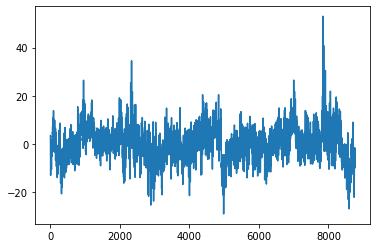

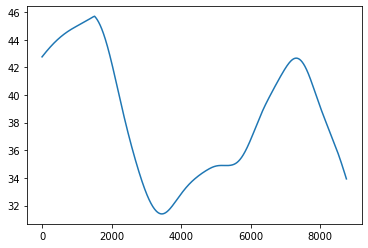

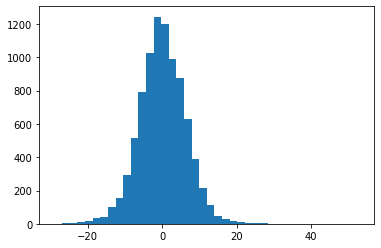

In [41]:
#prices_res.plot()
prices['price_trend'] = prices_res.trend
prices['price_seasonal'] = prices_res.seasonal
prices['price_resid'] = prices_res.resid
plt.plot(prices['price_resid'][:8760])
plt.show()
plt.plot(prices['price_trend'][:8760])
plt.show()
plt.hist(prices['price_resid'][:8760], bins=40);

Prix du prétrole et des émissions

       Unnamed: 0   oil_price  coal_price  gas_price  co2_price  \
0               0  352.446024   93.546575  38.051287   6.903732   
1               1  352.422575   93.554525  38.022534   6.903888   
2               2  352.399126   93.562475  37.993781   6.904044   
3               3  352.375677   93.570425  37.965028   6.904199   
4               4  352.352228   93.578375  37.936275   6.904355   
...           ...         ...         ...        ...        ...   
35059       35059  389.699802  141.278862  56.241700  23.124524   
35060       35060  389.670362  141.288722  56.239082  23.123750   
35061       35061  389.640922  141.298583  56.236464  23.122976   
35062       35062  389.611482  141.308443  56.233847  23.122202   
35063       35063  389.582042  141.318304  56.231229  23.121429   

               TIMESTAMP_d  oil_price_trend  oil_price_seasonal  \
0      2015-01-01 00:00:00       334.540199            8.827149   
1      2015-01-01 01:00:00       334.580450            8.7746

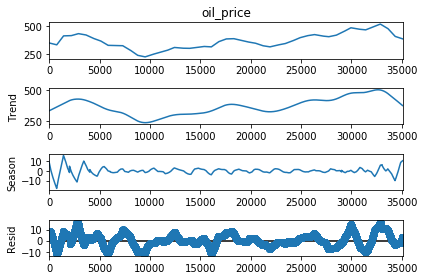

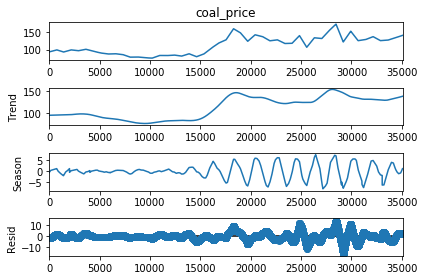

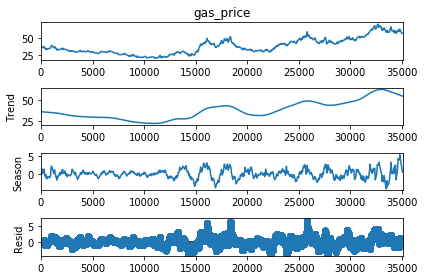

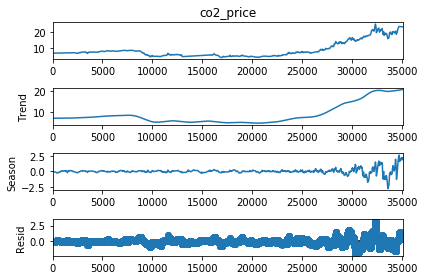

In [42]:
for driver in ['oil_price', 'coal_price', 'gas_price', 'co2_price']:
    driver_res = STL(fuel_emission_prices[driver], period=24*7*12).fit()
    driver_res.plot()
    fuel_emission_prices[f'{driver}_trend'] = driver_res.trend
    fuel_emission_prices[f'{driver}_seasonal'] = driver_res.seasonal
    fuel_emission_prices[f'{driver}_resid'] = driver_res.resid
print(fuel_emission_prices)


Facteur de disponibilité + Consumption &rarr; Marge

In [43]:
def compute_margin(year_test, area):
    INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/data/'

    avail_factor_df = pd.read_csv(INPUT_FOLDER + 'r_availabilityFactor' + str(year_test) + '_' + str(area) + '.csv')
    area_consumption_df = pd.read_csv(INPUT_FOLDER + 'r_areaConsumption_no_phes' + str(year_test) + '_' + str(area) + '.csv')
    tech_case='r_article_ramp'
    tech_parameters_df = pd.read_csv(INPUT_FOLDER+'Gestion_'+tech_case+'_TECHNOLOGIES'+str(year_test)+'.csv')
    tech_parameters_df.fillna(0, inplace=True)

    avail_factor_df = avail_factor_df.join(tech_parameters_df.set_index('TECHNOLOGIES')['capacity'], on='TECHNOLOGIES')
    avail_factor_df = avail_factor_df.assign(real_capacity=lambda x:x.capacity*x.availabilityFactor)
    real_capacities = avail_factor_df[['TIMESTAMP', 'real_capacity']].groupby('TIMESTAMP').sum()
    real_capacities.reset_index(inplace=True)
    real_capacities['margin'] = real_capacities['real_capacity'] - area_consumption_df['areaConsumption']

    return real_capacities['margin']

In [44]:
margin_df = pd.DataFrame()
for year in years:
    margin = compute_margin(year, 'FR')
    margin_df = pd.concat((margin_df, margin), ignore_index=True)
margin_df = margin_df.rename({0:'margin'}, axis='columns')
print(margin_df)

        margin
0      22626.0
1      21960.0
2      25178.0
3      28407.0
4      30563.0
...        ...
35059  25801.0
35060  27926.0
35061  29386.0
35062  24657.0
35063  23700.0

[35064 rows x 1 columns]


        margin  margin_trend  margin_seasonal  margin_resid
0      22626.0  26765.660493     -4135.566987     -4.093506
1      21960.0  26764.065093     -4388.635445   -415.429648
2      25178.0  26762.470453     -1151.111079   -433.359375
3      28407.0  26760.876575      1421.021465    225.101960
4      30563.0  26759.283457      2483.879697   1319.836846
...        ...           ...              ...           ...
35059  25801.0  24931.381591      -161.658916   1031.277325
35060  27926.0  24933.779052      1502.553509   1489.667439
35061  29386.0  24936.177213       237.693785   4212.129002
35062  24657.0  24938.576075      -829.536497    547.960423
35063  23700.0  24940.975635       689.971403  -1930.947038

[35064 rows x 4 columns]


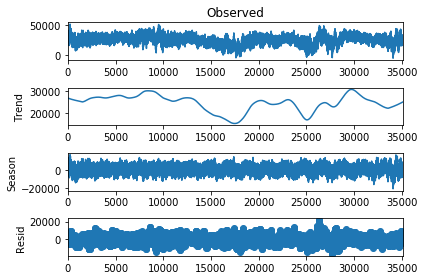

In [45]:
margin_res = STL(margin_df, period=24*7*12).fit()
margin_res.plot()
margin_df['margin_trend'] = margin_res.trend
margin_df['margin_seasonal'] = margin_res.seasonal
margin_df['margin_resid'] = margin_res.resid
print(margin_df)

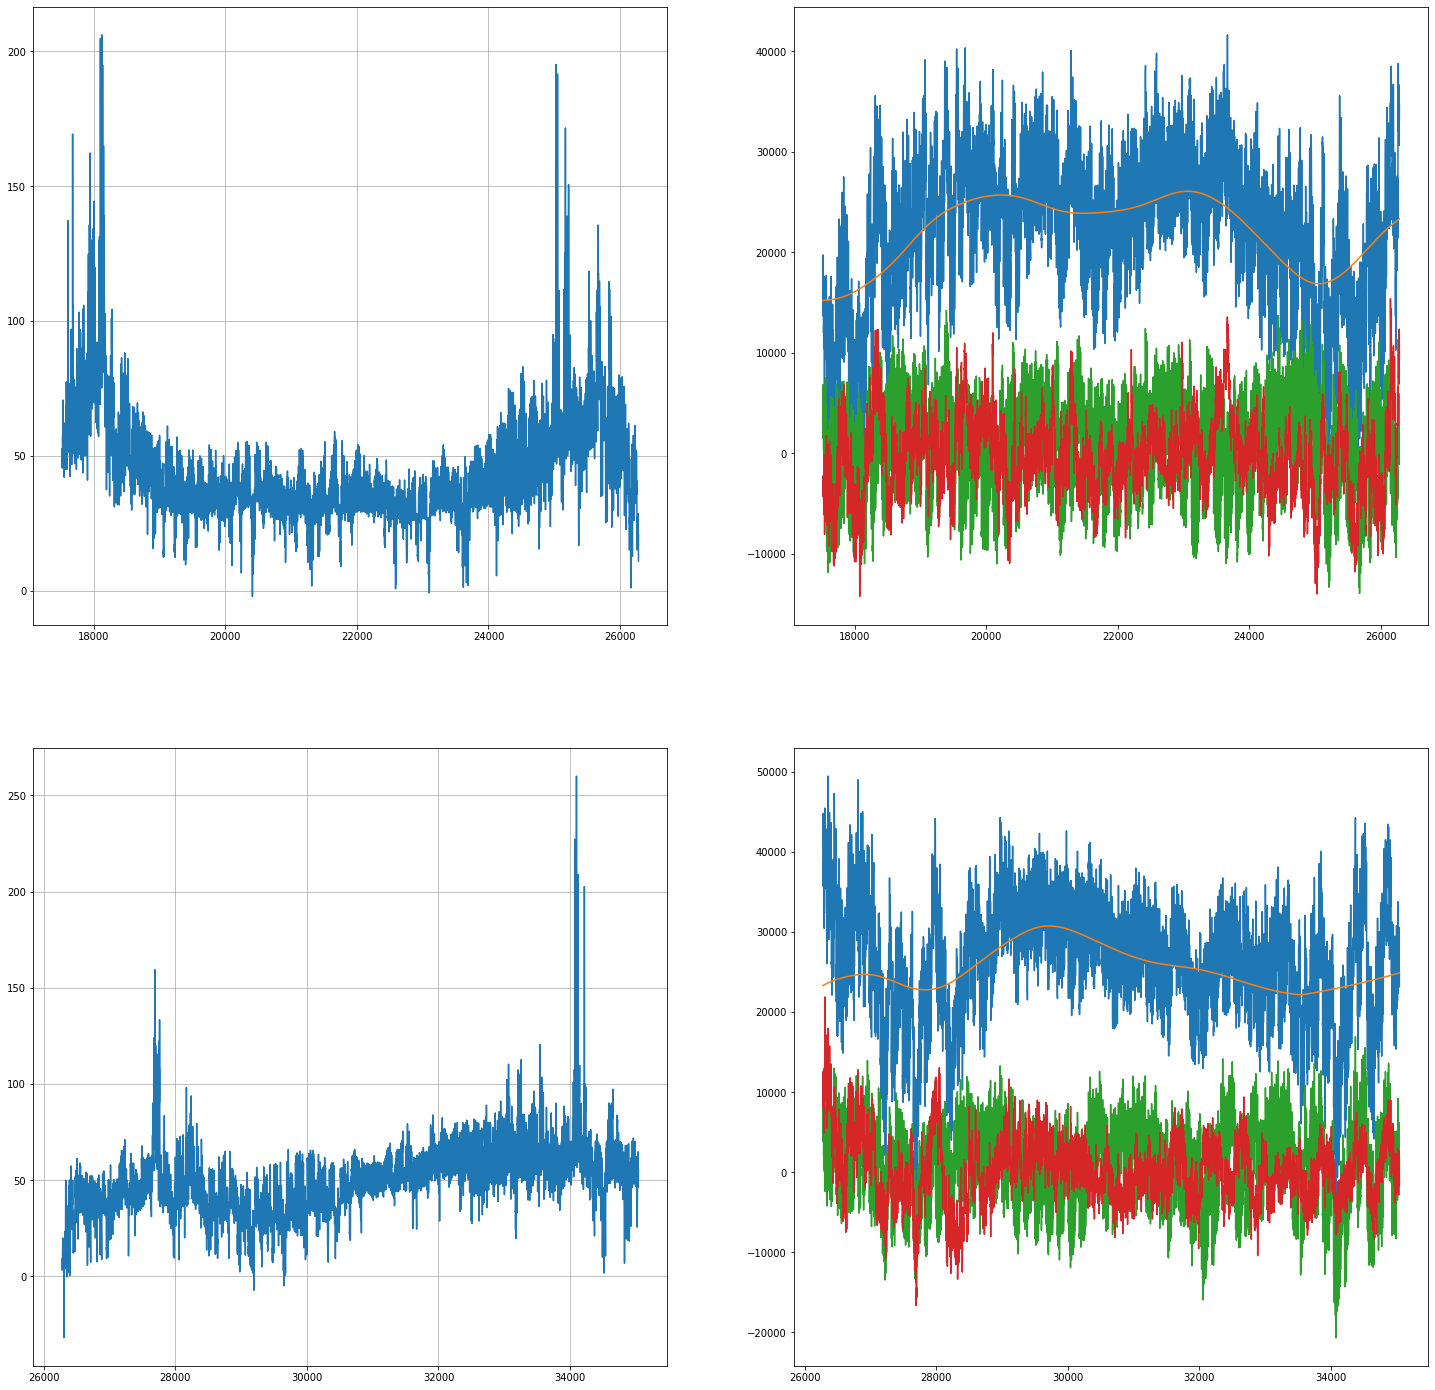

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(25, 25))
deb = 8760*2
fin = 8760*3
axs[0, 0].plot(prices['price_obs'][deb:fin])
axs[0, 1].plot(margin_df[deb:fin])
axs[0, 0].grid(True)

deb = 8760*3
fin = 8760*4
axs[1, 0].plot(prices['price_obs'][deb:fin])
axs[1, 1].plot(margin_df[deb:fin])
axs[1, 0].grid(True)

## Création des datasets finaux (avec tout pour le prix, résidus uniquement pour les prix et la marge)

In [47]:
final_fuel_emission_prices = pd.read_csv(INPUT_FOLDER + 'r_fuel_prices_df_15_18.csv')
for driver in ['oil_price', 'coal_price', 'gas_price', 'co2_price']:
    final_fuel_emission_prices[driver] = fuel_emission_prices[driver+'_resid']
final_margin = pd.DataFrame()
final_margin['TIMESTAMP_d'] = final_fuel_emission_prices['TIMESTAMP_d']
final_margin['margin'] = margin_df['margin_resid']
print(final_fuel_emission_prices, final_margin)

       Unnamed: 0  oil_price  coal_price  gas_price  co2_price  \
0               0   9.078676   -1.568828   0.392850  -0.059326   
1               1   9.067429   -1.568313   0.378979  -0.059570   
2               2   9.056161   -1.567796   0.365107  -0.059814   
3               3   9.044874   -1.567280   0.351235  -0.060057   
4               4   9.033567   -1.566763   0.337361  -0.060300   
...           ...        ...         ...        ...        ...   
35059       35059   3.079311    1.752752   0.601411   0.610887   
35060       35060   3.105590    1.744952   0.617378   0.623634   
35061       35061   3.131849    1.737154   0.633343   0.636380   
35062       35062   3.158086    1.729360   0.649306   0.649126   
35063       35063   3.184302    1.721568   0.671552   0.656364   

               TIMESTAMP_d  
0      2015-01-01 00:00:00  
1      2015-01-01 01:00:00  
2      2015-01-01 02:00:00  
3      2015-01-01 03:00:00  
4      2015-01-01 04:00:00  
...                    ...  
3505

In [48]:
OUTPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/data_preprocessed/'

In [49]:
prices.drop('Unnamed: 0', axis='columns').to_csv(OUTPUT_FOLDER + 'obs_prices.csv')
final_margin.to_csv(OUTPUT_FOLDER + 'margin.csv')
final_fuel_emission_prices.drop('Unnamed: 0', axis='columns').to_csv(OUTPUT_FOLDER + 'fuel_prices.csv')